**<center><font size=5>Visualization of variables in EEG data</font></center>**
**<center>Gifted Group <i>vs</i> Control Group</center>**
***
**author**: Ábner Lucas
**date**: Junho, 2022
**[GitHub Repository](https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git)**

### Table of Contents
- <a href='#intro'>1. Visão Geral do Projeto</a> 
- <a href='#env'>2. Configurando o Ambiente</a>
 - <a href='#import'>2.1. Importando dados</a>
 - <a href='#var_des'>2.2. Descrição da variáveis</a>
- <a href='#sample'>3. Visualização da Amostra de Dados</a> 
 - <a href='#s1'>3.1. Amostra de dados por estímulo</a>
  - <a href='#s1_funcs'>3.1.1. Funções</a>
  - <a href='#s1_a1'>3.1.2 Amostra de dados: sujeito 5, estímulo 45 (150º, diferentes)</a>
  - <a href='#s1_a2'>3.1.3 Amostra de dados: sujeito 5, estímulo 45 (150º, iguais)</a>
  - <a href='#s1_a3'>3.1.4 Amostra de dados: sujeito 7, estímulo 10 (0º, diferentes)</a>
  - <a href='#s1_a4'>3.1.5 Amostra de dados: sujeito 7, estímulo 10 (0º, iguais)</a>
 - <a href='#s2'>3.2. Amostra de dados evocados</a>
  - <a href='#s2_funcs'>3.2.1 Funções</a>
  - <a href='#s2_a1'>3.2.2 Amostra da média dos trials: sujeito 5</a>
  - <a href='#s2_a2'>3.2.3 Amostra das médias dos sujeitos do grupo controle</a>
  - <a href='#s2_a3'>3.2.4 Amostra das médias dos sujeitos do grupo superdotado</a>

### <a id='intro'>1. Visão Geral do Projeto</a>

O conjunto de dados utilizado contém dados de [EEG (Electroencephalography)](https://pt.wikipedia.org/wiki/Eletroencefalografia) para dois grupos - Superdotados e Grupo de Controle.
<br><center>
![](https://i.imgur.com/ZrmxJRu.jpg)</center>
<br>A quantidade de sujeitos em cada grupo é 15 (criança/adolescente). Os 64 eletrodos foram colocados no couro cabeludo dos sujeitos para medir a atividade elétrica do cérebro. Os valores de resposta foram amostrados em segmentos de 4200Hz (1Hz = 1s = 1000ms). Cada sujeito foi exposto a no mínimo 120 e no máximo 160 estímulos com imagens semelhantes às utilizadas por [Ganis and Kievit (2015)](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ai/). Os participantes foram instruídos a julgar se as imagens eram “iguais” ou “diferentes”, em ambas as condições experimentais a imagem do lado direito foi girada em relação à imagem da esquerda e poderia ser normal ou invertida em espelho, no sentido horário em torno do eixo longitudinal em
incrementos de 50° de 0° a 150° (disparidade de ângulo). Para ambas as condições, um total de 80 tentativas foram apresentadas, com 20 tentativas para cada disparidade de ângulo (0°, 50°, 100° e 150°).

<b>O objetivo desta análise será observar as diferenças de amplitudes nos valores de resposta para diferentes estímulos (bem como suas médias) entre o grupo controle e o grupo superdotado, no intuito de predizer padrões para os dois grupos.</b>

### <a id='env'>2. Configurando o Ambiente</a>

#### <a id='import'>2.1. Importando os dados</a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# !git clone https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git

In [1]:
import os
import sys
#sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('/content/time_series_prediction_on_EEG_data/'))
from src.plot_series import PlotSeries
from src.plot_series import Subplot2D
from src.functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# filenames_list = os.listdir('D:/Documentos/Mestrado/2021/UFPA Ciência Computação/EEG/outputs_eeg/') # lista de nomes de arquivos no diretório
filenames_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/')
xs = [f'{x[:7]} {x[7:11]}' for x in filenames_list if x.endswith('trials.csv')]
print('Quantidade total de coletas: ' + str(len(xs)) + ' sujeitos')
print(xs)

Quantidade total de coletas: 19 sujeitos
['subject 0015', 'subject 0010', 'subject 0018', 'subject 0012', 'subject 0006', 'subject 0013', 'subject 0014', 'subject 0009', 'subject 0007', 'subject 0005', 'subject 0008', 'subject 0016', 'subject 0028', 'subject 0019', 'subject 0020', 'subject 0022', 'subject 0027', 'subject 0039', 'subject 0011']


In [4]:
EEG_trials = load_trials(filenames_list)
EEG_trials.info()

100%|██████████| 76/76 [02:19<00:00,  1.83s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737432 entries, 0 to 12737431
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  object 
 1   group       object 
 2   time        int64  
 3   condition   object 
 4   trial       int64  
 5   F7          float64
 6   F3          float64
 7   Fz          float64
 8   F4          float64
 9   F8          float64
 10  P7          float64
 11  P3          float64
 12  Pz          float64
 13  P4          float64
 14  P8          float64
 15  F5          float64
 16  F1          float64
 17  F2          float64
 18  F6          float64
 19  P5          float64
 20  P1          float64
 21  P2          float64
 22  P6          float64
dtypes: float64(18), int64(2), object(3)
memory usage: 2.2+ GB


In [3]:
EEG_evoked = load_evoked(filenames_list)
EEG_evoked.info()

100%|██████████| 76/76 [00:01<00:00, 54.66it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79819 entries, 0 to 79818
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  79819 non-null  object 
 1   group       79819 non-null  object 
 2   time        79819 non-null  int64  
 3   F7          79819 non-null  float64
 4   F3          79819 non-null  float64
 5   Fz          79819 non-null  float64
 6   F4          79819 non-null  float64
 7   F8          79819 non-null  float64
 8   P7          79819 non-null  float64
 9   P3          79819 non-null  float64
 10  Pz          79819 non-null  float64
 11  P4          79819 non-null  float64
 12  P8          79819 non-null  float64
 13  F5          79819 non-null  float64
 14  F1          79819 non-null  float64
 15  F2          79819 non-null  float64
 16  F6          79819 non-null  float64
 17  P5          79819 non-null  float64
 18  P1          79819 non-null  float64
 19  P2          79819 non-nul

In [6]:
EEG_ip = load_ip(filenames_list)
EEG_ip.info()

100%|██████████| 76/76 [00:03<00:00, 19.78it/s] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_id         3032 non-null   object
 1   group              3032 non-null   object
 2   condition          3032 non-null   object
 3   response_expected  3032 non-null   object
 4   response_obtained  3032 non-null   object
 5   response_time      3032 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 142.2+ KB


In [7]:
#EEG_diferentes = EEG_data.loc[EEG_data['condition'].str.endswith('R')]
#EEG_diferentes

#### <a id='var_des'>2.2. Descrição das variáveis</a>

* `subject_id`: código de série atribuído a cada sujeito
* `group`: classificação do sujeito em `gifted` - Superdotado e `control` - Controle
* `time`: tempo da coleta medido em milissegundos (número da amostra -0.2Hz - 4Hz)
* `condition`: condição experimental (estímulo - Stimulus/A_B_C)
 * `A` - número identificador do par de figuras, `B` - disparidade do ângulo, `C` - par de figuras diferentes (caso não tenha essa informação indica que as figuras são iguais)
* `trial`: número da avaliação na ordem de apresentada ao sujeito
* `F7 - P6`: posição do eletrodo colocado no couro cabeludo do sujeito (com base no sistema International 10-20), para cada canal tem-se o valor do sensor em microvolts (µV)
<br><center>
![](https://i.ibb.co/M2GRQNz/670px-International-10-20-system-for-EEG-MCN-svg.png)</center>

Os eletrodos apresentados correspondem apenas às regiões frontal e parietal.

### <a id='sample'>3. Visualização da amostra de dados</a>

Nesta seção, para cada um sujeito dos grupos será traçada a superfície 2-D e 3-D dos valores de resposta para inspecionar visualmente a diferença entre os grupos.

#### <a id='s1'>3.1. Amostra de dados por estímulo</a>

##### <a id='s1_a1'>3.1.1 Amostra de dados: sujeito 5, estímulo 45 (150º, diferentes)</a>

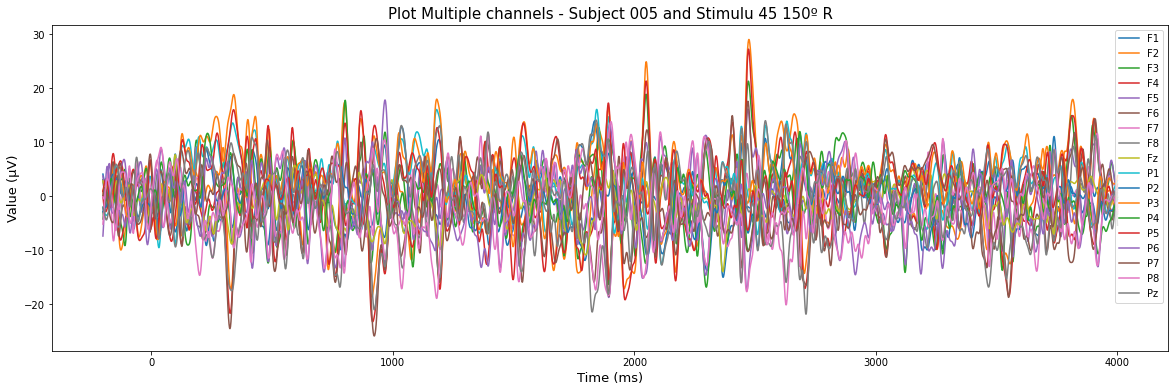

In [8]:
subject_id1 = '0005'
stimulu1 = 'Stimulus/45_150_R'

S_sample_df, raw_data = subject_trial_data(subject_id1, stimulu1, EEG_trials)
fig1 = PlotSeries.plot_2D(raw_data,'Subject 005 and Stimulu 45 150º R')
# fig1.savefig('outputs_fig/fig1_0005_s_45_150_R.png')
fig1.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig1_0005_s_45_150_R.png')

In [9]:
#PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a2'>3.1.2 Amostra de dados: sujeito 5, estímulo 45 (150º, iguais)</a>

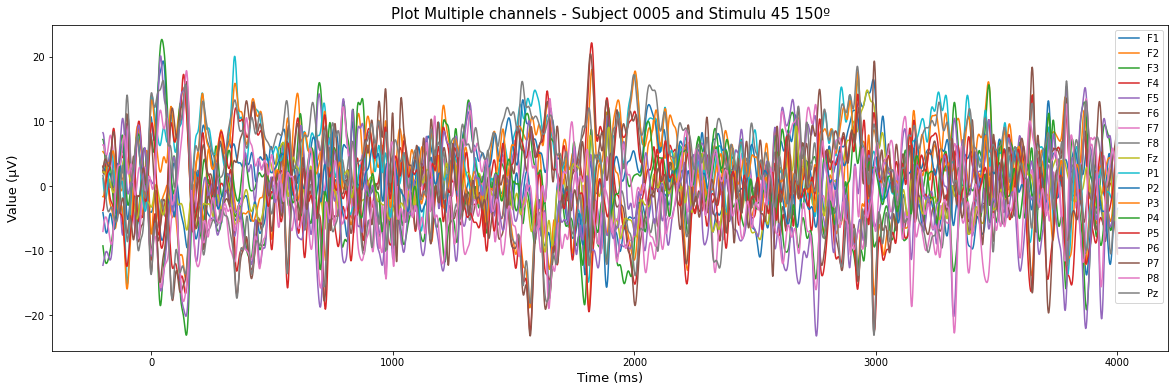

In [10]:
subject_id1 = '0005'
stimulu2 = 'Stimulus/45_150'

S_sample_df, raw_data = subject_trial_data(subject_id1, stimulu2, EEG_trials)

fig2 = PlotSeries.plot_2D(raw_data,'Subject 0005 and Stimulu 45 150º')
# fig2.savefig('outputs_fig/fig2_0005_s_45_150.png')
fig2.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig2_0005_s_45_150.png')

In [11]:
#PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a3'>3.1.3 Amostra de dados: sujeito 7, estímulo 10 (0º, diferentes)</a>

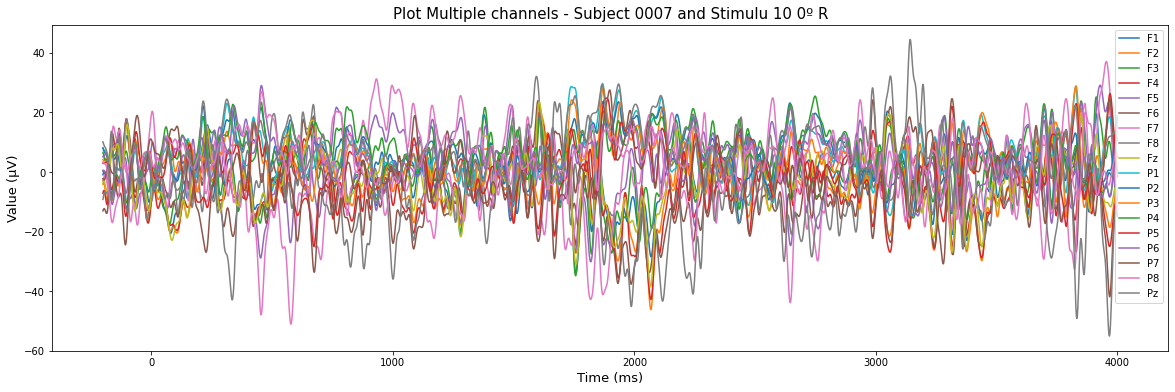

In [12]:
subject_id2 = '0007'
stimulu3 = 'Stimulus/10_0_R'

S_sample_df, raw_data = subject_trial_data(subject_id2, stimulu3, EEG_trials)
fig3 = PlotSeries.plot_2D(raw_data,'Subject 0007 and Stimulu 10 0º R')
# fig3.savefig('outputs_fig/fig3_0007_s_10_0_R.png')
fig3.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig3_0007_s_10_0_R.png')

In [13]:
#PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a4'>3.1.4 Amostra de dados: sujeito 7, estímulo 10 (0º, iguais)</a>

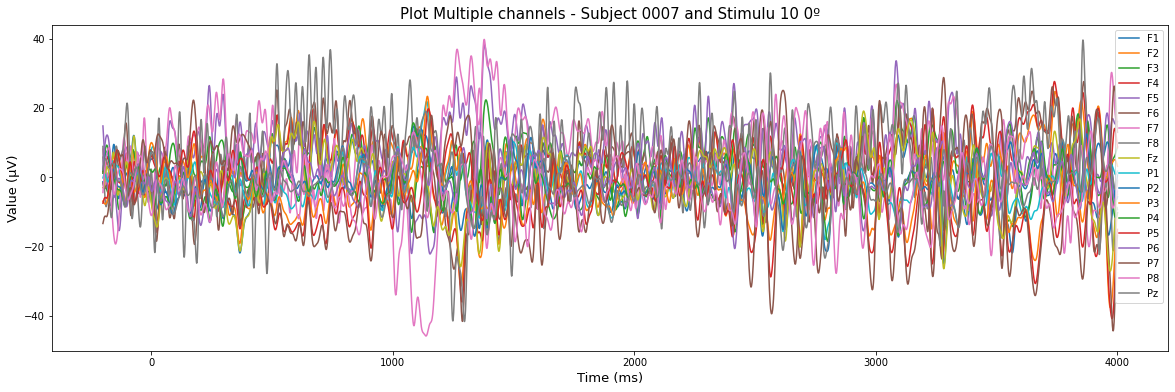

In [14]:
subject_id2 = '0007'
stimulu4 = 'Stimulus/10_0'

S_sample_df, raw_data = subject_trial_data(subject_id2, stimulu4, EEG_trials)
fig4 = PlotSeries.plot_2D(raw_data,'Subject 0007 and Stimulu 10 0º')
# fig4.savefig('outputs_fig/fig4_0007_s_10_0_R.png')
fig4.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig4_0007_s_10_0_R.png')

In [15]:
#PlotSeries.plot_3dSurface_and_heatmap(S_sample_df)

#### <a id='s2'>3.2. Amostra de dados evocados</a>

In [16]:
subs = EEG_evoked['subject_id'].unique()
print(f'Dados evocados de todos os {len(subs)} sujeitos.')

Dados evocados de todos os 19 sujeitos.


##### <a id='s2_a1'>3.2.1 Amostra da média dos trials: sujeito 0005</a>

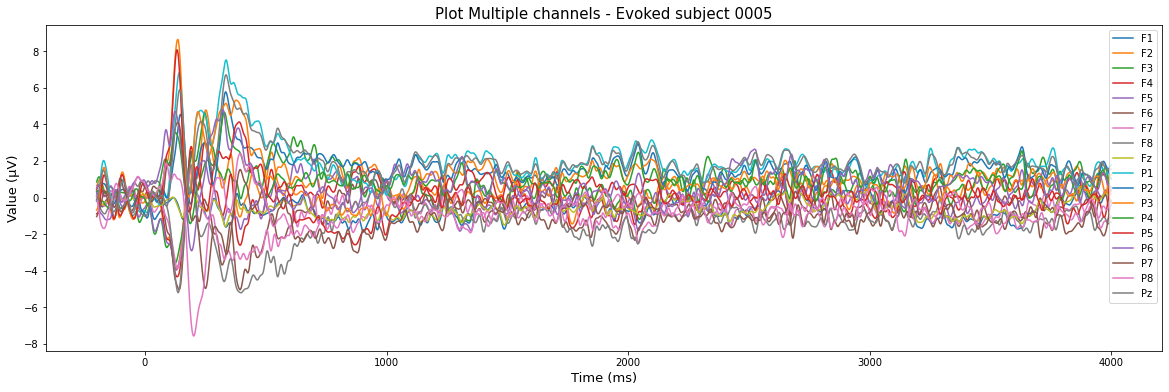

In [17]:
subject_id = '0005'
S_sample_df, raw_data = evoked_data(subject_id, EEG_evoked)
fig5 = PlotSeries.plot_2D(raw_data,'Evoked subject 0005')
# fig5.savefig('outputs_fig/fig5_0005_evoked.png')
fig5.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig5_0005_evoked.png')

In [18]:
#PlotSeries.plot_3dSurface_and_heatmap(S_sample_df, 'evoked')

##### <a id='s2_a2'>3.2.2 Amostra das médias dos sujeitos do grupo controle</a>

In [4]:
sensors_left = ['F7', 'F5', 'F3', 'F1', 'P7', 'P5', 'P3', 'P1']
sensor_right = ['F8', 'F6', 'F4', 'F2', 'P8', 'P6', 'P4', 'P2']
sensor_frontal = ['F7', 'F5', 'F3', 'F1','F8', 'F6', 'F4', 'F2']
sensor_parietal = ['P7', 'P5', 'P3', 'P1', 'P8', 'P6', 'P4', 'P2']

In [5]:
control_subjects = EEG_evoked[EEG_evoked['group'] == 'control']
C_sample_df, C_data = mean_evokeds(control_subjects)

C_data_rigth = C_data[sensor_right]
C_data_left = C_data[sensors_left]
C_data_frontal = C_data[sensor_frontal]
C_data_parietal = C_data[sensor_parietal]

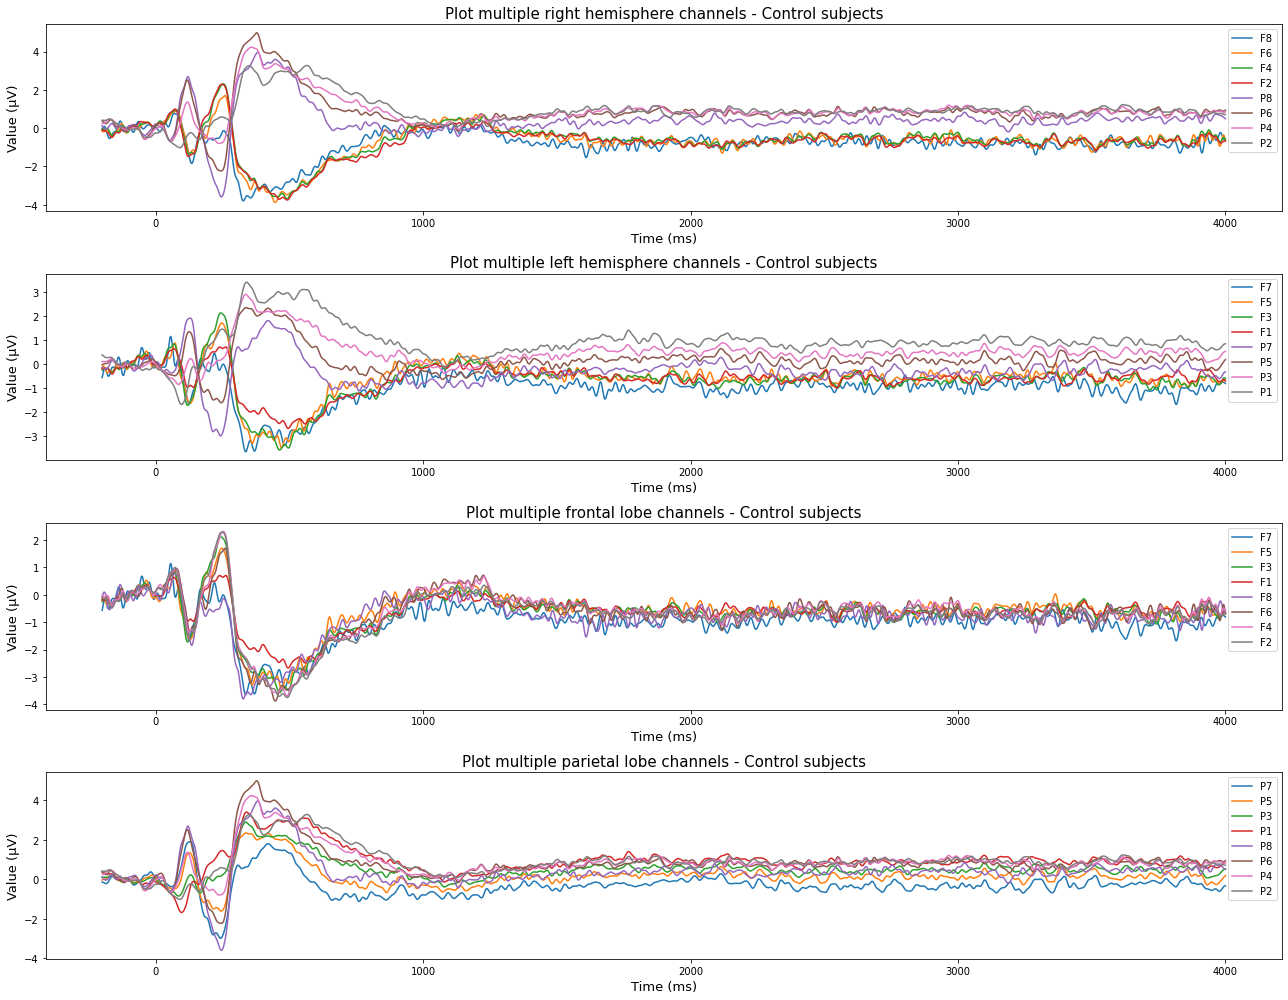

In [21]:
sp = Subplot2D(nrows=4, ncols=1)
sp.add_subplot(C_data_rigth, 1, 'Plot multiple right hemisphere channels - Control subjects')
sp.add_subplot(C_data_left, 2, 'Plot multiple left hemisphere channels - Control subjects', sharex=1)
sp.add_subplot(C_data_frontal, 3, 'Plot multiple frontal lobe channels - Control subjects', sharex=1)
sp.add_subplot(C_data_parietal, 4, 'Plot multiple parietal lobe channels - Control subjects', sharex=1)
fig6 = sp.show();
# fig6.savefig('outputs_fig/fig6_control_evoked.png')
fig6.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig6_control_evoked.png')

##### <a id='s2_a3'>3.2.3 Amostra das médias dos sujeitos do grupo superdotado</a>

In [6]:
gifted_subjects = EEG_evoked[EEG_evoked['group'] == 'gifted']
G_sample_df, G_data = mean_evokeds(gifted_subjects)

G_data_rigth = G_data[sensor_right]
G_data_left = G_data[sensors_left]
G_data_frontal = G_data[sensor_frontal]
G_data_parietal = G_data[sensor_parietal]

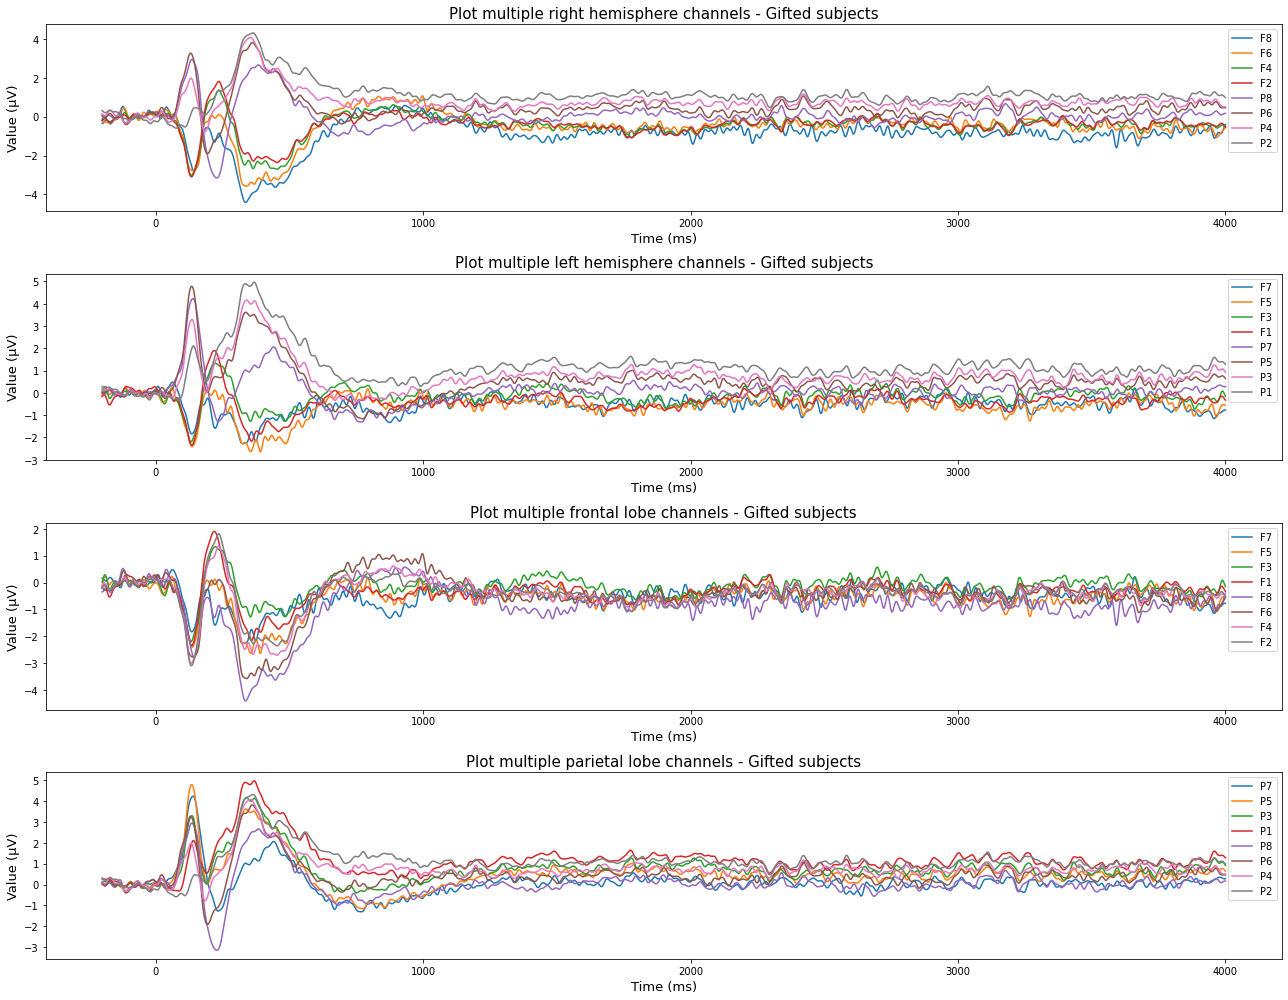

In [23]:
sp = Subplot2D(nrows=4, ncols=1)
sp.add_subplot(G_data_rigth, 1, 'Plot multiple right hemisphere channels - Gifted subjects')
sp.add_subplot(G_data_left, 2, 'Plot multiple left hemisphere channels - Gifted subjects', sharex=1)
sp.add_subplot(G_data_frontal, 3, 'Plot multiple frontal lobe channels - Gifted subjects', sharex=1)
sp.add_subplot(G_data_parietal, 4, 'Plot multiple parietal lobe channels - Gifted subjects', sharex=1)
fig7 = sp.show();
# fig7.savefig('outputs_fig/fig7_gifted_evoked.png')
fig7.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig7_gifted_evoked.png')

#### <a id='t1'>3.3. Analisando tendências e diferenças de amplitudes</a>
Análise de tendências, após remoção de ruídos que prejudicam a visualização, usando a técnica de médias móveis simples. E análise da diferenças de amplitude de cada amostra, após eliminar a tendência, usando a técnica de diferenças sucessivas.

##### <a id='t_a1a2'>3.3.1 Tendências para os sujeitos do grupo Controle e Superdotado</a>

<Figure size 1296x1008 with 0 Axes>

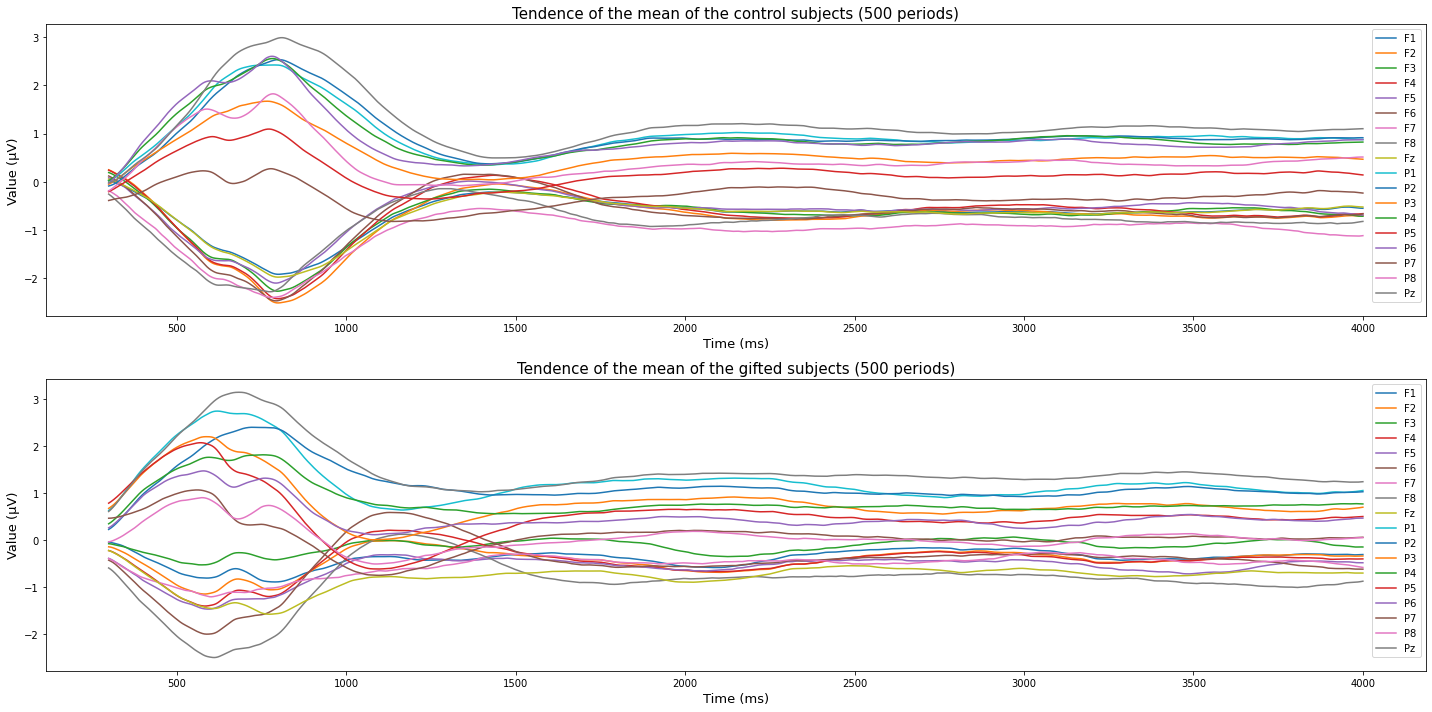

In [24]:
sp = Subplot2D(nrows=2, ncols=1)
plt.figure(figsize=(20,10))
sp.add_subplot(C_data.rolling(500).mean(), 1, 'Tendence of the mean of the control subjects (500 periods)')
sp.add_subplot(G_data.rolling(500).mean(), 2, 'Tendence of the mean of the gifted subjects (500 periods)', sharex=1)
fig8 = sp.show()
# fig8.savefig('outputs_fig/fig8_group_tendence_mean.png')
fig8.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig8_group_tendence_mean.png')

Todas as séries possuem tendecia linear centrada em zero, como já esperado, uma vez que estamos trabalhando com dados pré processados de eletroencefalograma. Observado crescimento da amplitude nos primeiros 300 ms após o início do estímulo, seguido do descrescimento aos 700 ms até se manter estacionário a partir dos 1500 ms (**observado como a janela de tempo associada à negatividade relacionada à rotação do ERP**), nos apresentando ainda que para o lobo frontal dos sujeitos do grupo superdotado os sinais de cada eletrodo são bem mais esparsos em relação aos do grupo controle.

##### <a id='diff_a1'>3.3.2 Diferenças para os sujeitos do grupo Controle e Superdotado</a>

In [25]:
C_data_mean = C_data.mean(axis=1)
G_data_mean = G_data.mean(axis=1)
df = pd.DataFrame({'Control': C_data_mean.diff(2), 'Gifted': G_data_mean.diff(2)})

<Figure size 1296x1008 with 0 Axes>

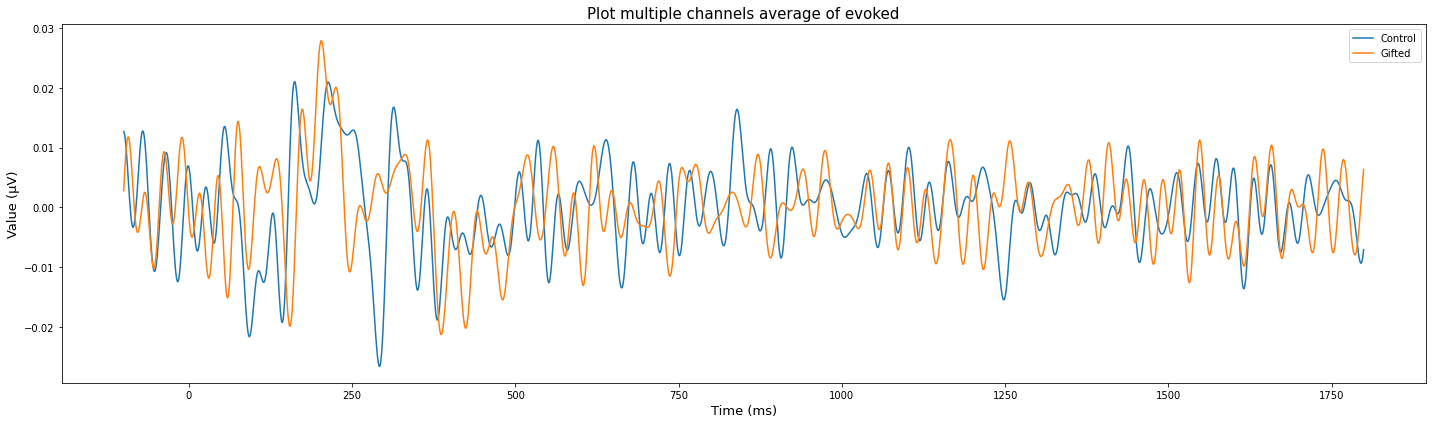

In [26]:
sp = Subplot2D(nrows=1, ncols=1)
plt.figure(figsize=(20,6))
sp.add_subplot(df.iloc[100:2000], 1, 'Plot multiple channels average of evoked')
fig9 = sp.show()
# fig9.savefig('outputs_fig/fig9_group_difference_channel_average.png')
fig9.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig9_group_difference_channel_average.png')

#### <a id='p1'>3.4. Predizendo amostras</a>

##### <a id='t2'>3.4.1 Tendência e sazionalidade das amostras dos dois grupos</a>

In [7]:
S_control_mean = control_subjects.copy().drop(columns=['subject_id','group','time'])
S_control_mean = S_control_mean.mean(axis=1)
c_average = pd.DataFrame({'time':range(len(S_control_mean)), 'control': S_control_mean})
#c_average['time'] = pd.to_datetime(c_average['time'], unit='ms')
c_average.set_index('time', drop=True, inplace=True)

S_gifted_mean = gifted_subjects.copy().drop(columns=['subject_id','group','time'])
S_gifted_mean = S_gifted_mean.mean(axis=1)
g_average = pd.DataFrame({'time':range(len(S_gifted_mean)), 'gifted': S_gifted_mean})
g_average.set_index('time', drop=True, inplace=True)

<Figure size 1296x1008 with 0 Axes>

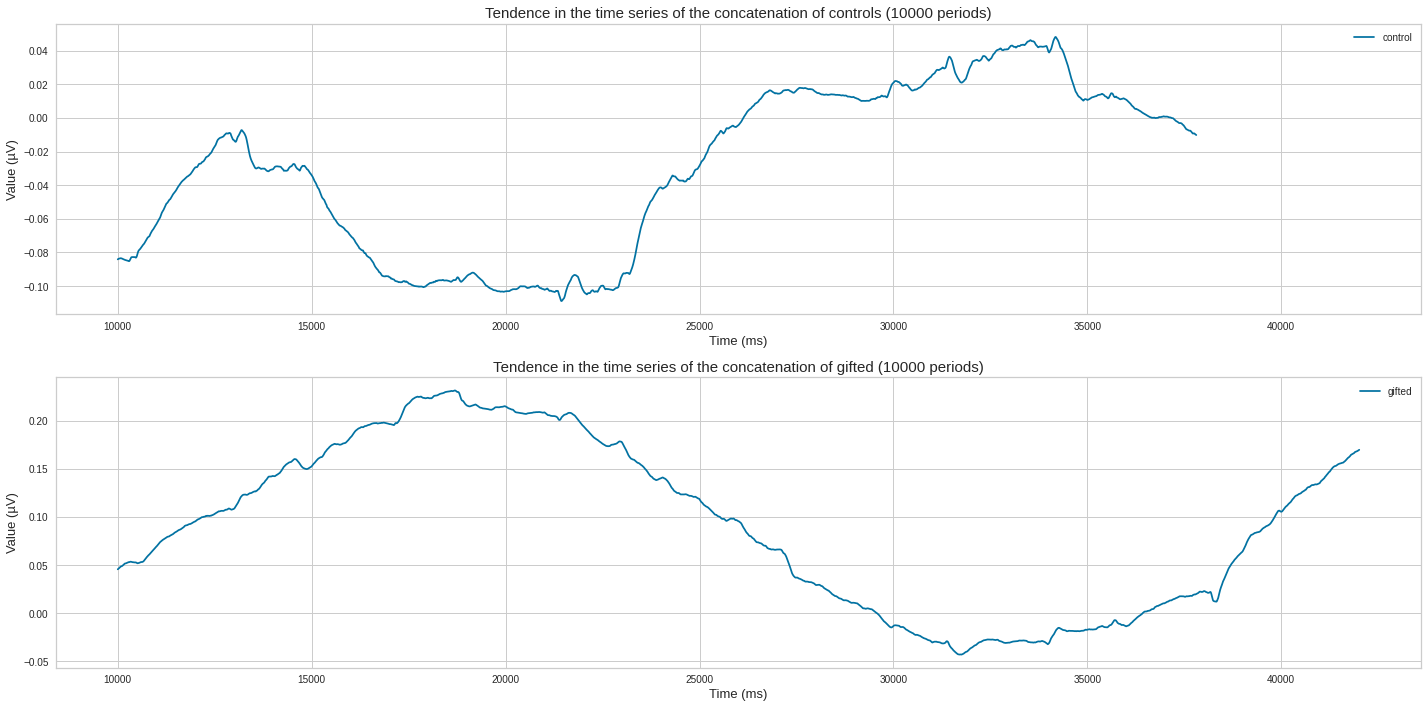

<Figure size 1296x1008 with 0 Axes>

In [39]:
sp = Subplot2D(nrows=2, ncols=1)
plt.figure(figsize=(20,10))
sp.add_subplot(c_average.rolling(10000).mean(), 1, 'Tendence in the time series of the concatenation of controls (10000 periods)')
sp.add_subplot(g_average.rolling(10000).mean(), 2, 'Tendence in the time series of the concatenation of gifted (10000 periods)', sharex=1)
sp.show()

<Figure size 1296x1008 with 0 Axes>

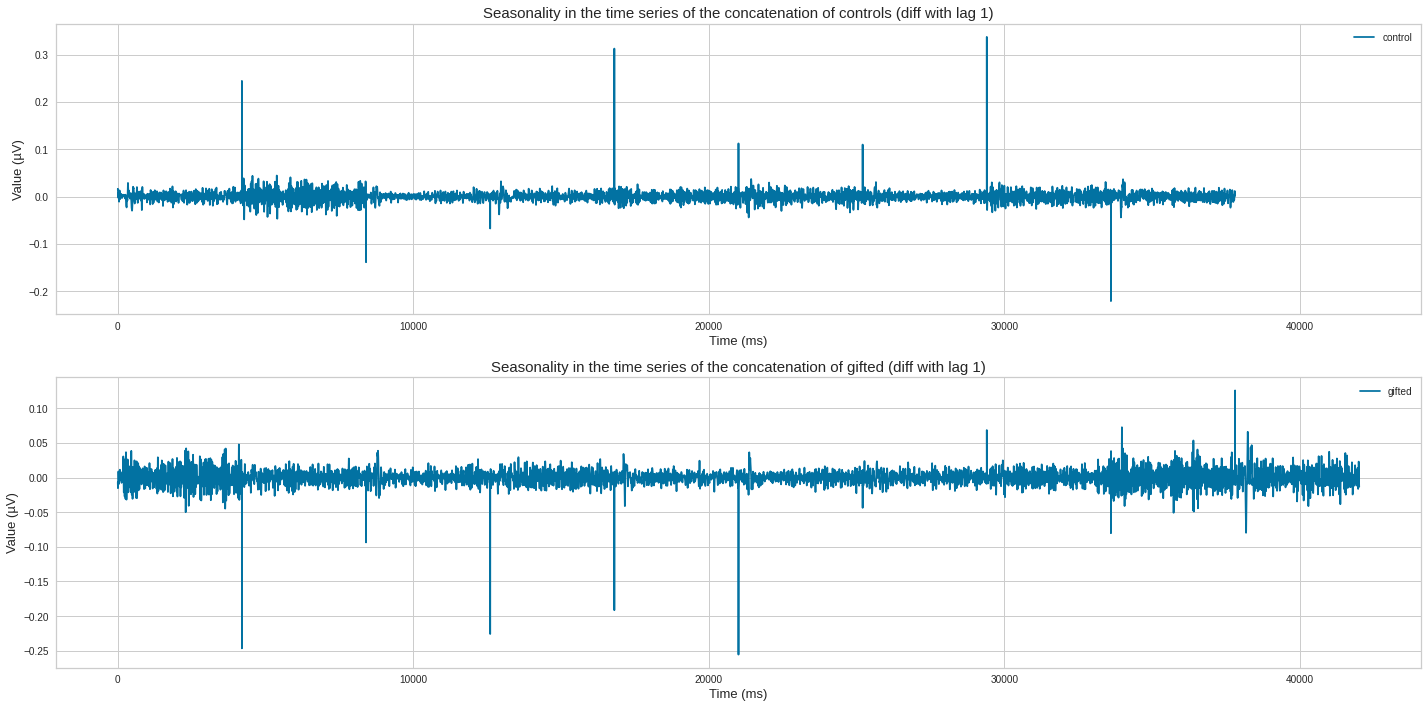

<Figure size 1296x1008 with 0 Axes>

In [42]:
sp = Subplot2D(nrows=2, ncols=1)
plt.figure(figsize=(20,10))
sp.add_subplot(c_average.diff(1), 1, 'Seasonality in the time series of the concatenation of controls (diff with lag 1)')
sp.add_subplot(g_average.diff(1), 2, 'Seasonality in the time series of the concatenation of gifted (diff with lag 1)', sharex=1)
sp.show()

##### <a id='p2'>3.4.2 Predição com ARIMA por grupo</a>

In [8]:
# !pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train = c_average.control[:-4200]
test = c_average.control[-4201:]
sarimax = SARIMAX(train, order=(5, 1, 2),seasonal_order=(5,1,2,4201)).fit()
(sarimax.resid ** 2).mean()

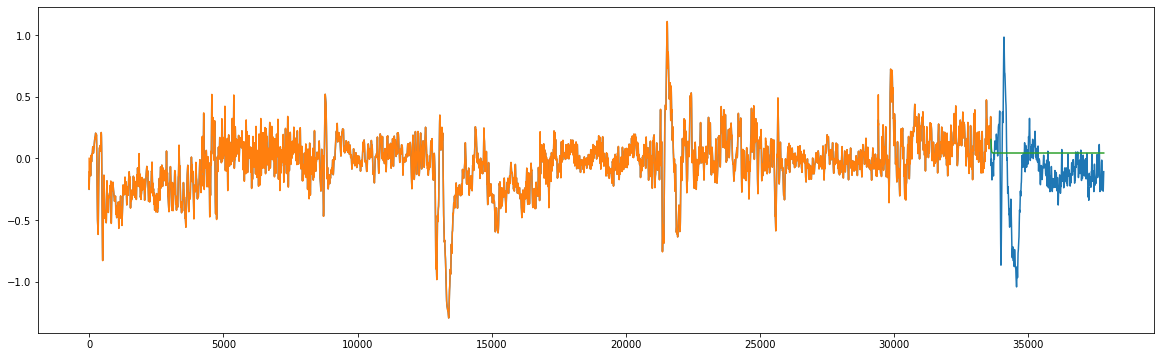

In [37]:
plt.figure(figsize=(20,6))
plt.plot(c_average.control)
plt.plot(sarimax.predict(typ='levels'))
plt.plot(sarimax.predict(start=33608, end=37808, dynamic=True, typ='levels'))

##### <a id='p3'>3.4.3 Construção de modelos com Pycaret</a>

In [ ]:
# !pip install pycaret-ts-alpha
from pycaret.time_series import *
import random

In [ ]:
EEG1 = EEG_evoked.copy()
# Transformando os dados categóricos em dados numéricos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
EEG1['group'] = labelencoder.fit_transform(EEG1.iloc[:,1].values)

In [ ]:
df1 = EEG1[EEG1['group'] == 0] #control
df2 = EEG1[EEG1['group'] == 1] #gifted
s1 = random.choice(df1['subject_id'].unique())
s2 = random.choice(df2['subject_id'].unique())
df_train = EEG1[(EEG1['subject_id'] != s1) | (EEG1['subject_id'] != s2)].reset_index(drop=True)
df_test = EEG1[(EEG1['subject_id'] == s1) | (EEG1['subject_id'] == s2)].reset_index(drop=True)

In [97]:
setup(data = df_train, fh=4201, fold=5, seasonal_period=4201,
             target = 'group',
             numeric_imputation_exogenous = 'mean', 
             ignore_features = ['subject_id','time'])
#setup(c_average, fh=4201, fold=5, seasonal_period=4201, fold_strategy='expanding')

Description                    Value
0                    session_id                     2545
1                        Target                    group
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape              (79819, 22)
5              Train data shape              (75618, 20)
6               Test data shape               (4201, 20)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                     4201
11          Seasonality Present                    False
12       Seasonalities Detected                      [1]
13          Primary Seasonality                        1
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     8668

In [ ]:
#exclude=['auto_arima','par_cds_dt','knn_cds_dt','rf_cds_dt','et_cds_dt']
bests_models = compare_models(n_select=3)

In [ ]:
bests_models

In [98]:
# ensemble_model = blend_models(bests_models)
ensemble_model = create_model('lr_cds_dt')

cutoff     MAE    RMSE          MAPE   SMAPE        MASE     RMSSE   R2
0     54612.0  0.1949  0.2208  1.949000e-01  0.1735   2660.7487   25.7979  0.0
1     58813.0  1.3619  1.3731  6.133559e+15  2.0000  20024.7058  166.4994  0.0
2     63014.0  0.2021  0.2281  9.099688e+14  2.0000   2546.4418   25.6111  0.0
3     67215.0  1.4156  1.4351  1.415600e+00  1.9991  19029.6629  166.3966  0.0
4     71416.0  0.9902  0.9903  4.459436e+15  2.0000  11785.9467  108.0420  0.0
Mean      NaN  0.8329  0.8495  2.300593e+15  1.6345  11209.5012   98.4694  0.0
SD        NaN  0.5384  0.5326  2.524739e+15  0.7305   7580.5649   63.1241  0.0

In [ ]:
plot_model(ensemble_model, fig_kwargs={'width': 1700})

In [ ]:
plot_model(ensemble_model, plot='train_test_split', fig_kwargs={'width': 1700})

In [ ]:
tuned_ensemble_model = tune_model(ensemble_model)

In [ ]:
interpret_model(tuned_ensemble_model)

In [ ]:
model_final = finalize_model(ensemble_model)
model_final

In [ ]:
plot_model(model_final, plot='forecast', fig_kwargs={'width': 1700})

In [ ]:
# pred = predict_model(model_final, fh=4201)
pred = predict_model(model_final, data = df_test)